In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("grocery_chain_data.csv")
df.head()

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1980 non-null   int64  
 1   store_name        1955 non-null   object 
 2   transaction_date  1980 non-null   object 
 3   aisle             1980 non-null   object 
 4   product_name      1980 non-null   object 
 5   quantity          1980 non-null   float64
 6   unit_price        1980 non-null   float64
 7   total_amount      1980 non-null   float64
 8   discount_amount   1980 non-null   float64
 9   final_amount      1980 non-null   float64
 10  loyalty_points    1980 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 170.3+ KB


In [5]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1955 non-null   int64  
 1   store_name        1955 non-null   object 
 2   transaction_date  1955 non-null   object 
 3   aisle             1955 non-null   object 
 4   product_name      1955 non-null   object 
 5   quantity          1955 non-null   float64
 6   unit_price        1955 non-null   float64
 7   total_amount      1955 non-null   float64
 8   discount_amount   1955 non-null   float64
 9   final_amount      1955 non-null   float64
 10  loyalty_points    1955 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 183.3+ KB


Con el metodo anterior logre descartar aquellas filas que contenian valores nulos o vacios

In [6]:
grouped_data = df2.groupby('store_name')['total_amount'].sum().sort_values(ascending=False)
print(grouped_data)

store_name
City Fresh Store      10888.12
SuperSave Central     10866.24
GreenGrocer Plaza     10846.82
MegaMart Westside     10274.18
Corner Grocery        10253.82
ValuePlus Market       9659.20
QuickStop Market       9169.07
FreshMart Downtown     9065.20
FamilyFood Express     8588.49
Name: total_amount, dtype: float64


In [7]:
abcdf = df.groupby('product_name')['total_amount'].sum().sort_values(ascending=False)
abcdf = abcdf.rename("total_sales").reset_index()
print(abcdf)

      product_name  total_sales
0         Tomatoes      5967.83
1            Bread      5924.94
2         Potatoes      5790.86
3   Chicken Breast      5662.29
4             Eggs      5426.07
5          Bananas      5205.83
6           Onions      5170.75
7           Cereal      5152.71
8     Orange Juice      5147.71
9            Pasta      5064.73
10          Apples      5017.11
11          Salmon      4913.29
12            Rice      4844.31
13          Yogurt      4833.34
14          Cheese      4616.18
15            Milk      4339.32
16     Ground Beef      4063.55
17         Carrots      3746.28


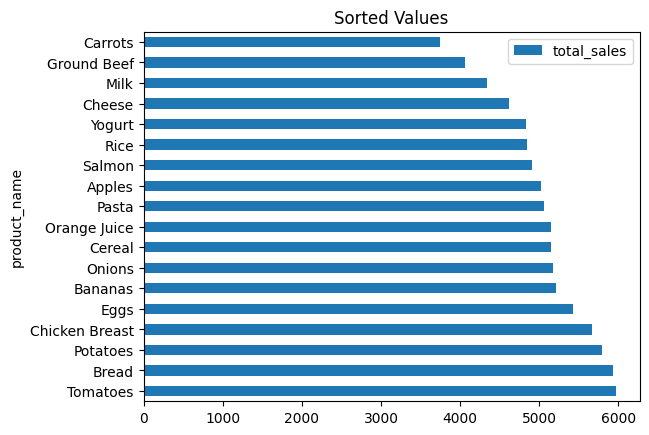

In [10]:
abcdf.plot(x='product_name', y='total_sales', kind='barh',title='Sorted Values')
plt.show()


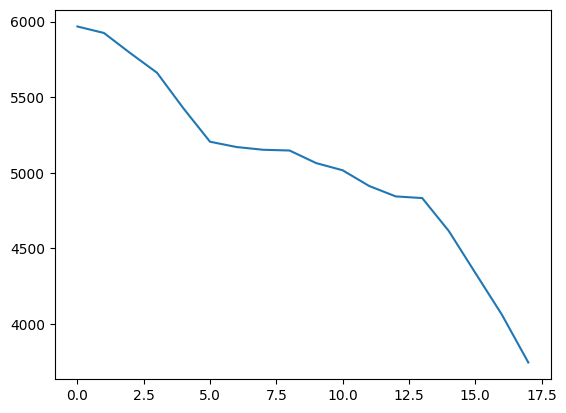

In [11]:
abcdf['total_sales'].plot(kind='line')
plt.show()

In [12]:
num_Items = len(abcdf)
total_revenue = abcdf['total_sales'].sum()
print(total_revenue)

abcdf['%Item'] = ((abcdf.index + 1) / num_Items) * 100
abcdf['%Item'] = abcdf['%Item'].map('{:.1f}%'.format)

resultados = []
for i in range(len(abcdf)):
    if i == 0:
        valor = abcdf.loc[i, 'total_sales'] / total_revenue
    else:
        valor = ((abcdf.loc[i, 'total_sales'] / total_revenue) + resultados[i-1]) 
    resultados.append(valor)
    

abcdf['%Revenue'] = resultados
abcdf['%Revenue'] = abcdf['%Revenue'] * 100

ABC = []
for i in range(len(abcdf)):
    valor_actual = abcdf.loc[i, '%Revenue']
    
    if valor_actual <= 40:
        valor = 'A'
    elif valor_actual <= 80:
        valor = 'B'
    else:
        valor = 'C'
        
    ABC.append(valor)

abcdf['ABC'] = ABC


abcdf['%Revenue'] = abcdf['%Revenue'].map('{:.1f}%'.format)

print(abcdf)

90887.09999999999
      product_name  total_sales   %Item %Revenue ABC
0         Tomatoes      5967.83    5.6%     6.6%   A
1            Bread      5924.94   11.1%    13.1%   A
2         Potatoes      5790.86   16.7%    19.5%   A
3   Chicken Breast      5662.29   22.2%    25.7%   A
4             Eggs      5426.07   27.8%    31.7%   A
5          Bananas      5205.83   33.3%    37.4%   A
6           Onions      5170.75   38.9%    43.1%   B
7           Cereal      5152.71   44.4%    48.7%   B
8     Orange Juice      5147.71   50.0%    54.4%   B
9            Pasta      5064.73   55.6%    60.0%   B
10          Apples      5017.11   61.1%    65.5%   B
11          Salmon      4913.29   66.7%    70.9%   B
12            Rice      4844.31   72.2%    76.2%   B
13          Yogurt      4833.34   77.8%    81.6%   C
14          Cheese      4616.18   83.3%    86.6%   C
15            Milk      4339.32   88.9%    91.4%   C
16     Ground Beef      4063.55   94.4%    95.9%   C
17         Carrots      3746

Prioritized Inventory Management:
ABC analysis reveals which inventory items are most critical to the business based on their value and consumption rate. Class A items, representing a small percentage of total items but a large portion of the total value, should be closely monitored and managed, while Class C items, representing a large percentage of the total items but a small portion of the total value, can be managed with less stringent controls. 

Optimized Resource Allocation:
By understanding the value and importance of each inventory item, businesses can allocate resources like storage space, personnel, and capital more effectively. For example, Class A items may receive more frequent cycle counts, tighter security, and faster replenishment, while Class C items might be managed with less frequent checks and more basic controls. 

Reduced Costs:
ABC analysis helps minimize inventory holding costs by reducing overstocking of low-value items and preventing stockouts of high-value items. It also reduces the cost of managing low-value items by applying less intensive controls. 

Improved Forecasting:
By analyzing sales data for each category, businesses can improve forecasting accuracy for both high-value and low-value items. This helps in making better purchasing decisions and optimizing inventory levels. 

Enhanced Supplier Relationships:
Understanding the importance of different inventory items can lead to better relationships with suppliers, especially for critical Class A items. This can result in better pricing, more reliable delivery, and improved overall supply chain performance. 

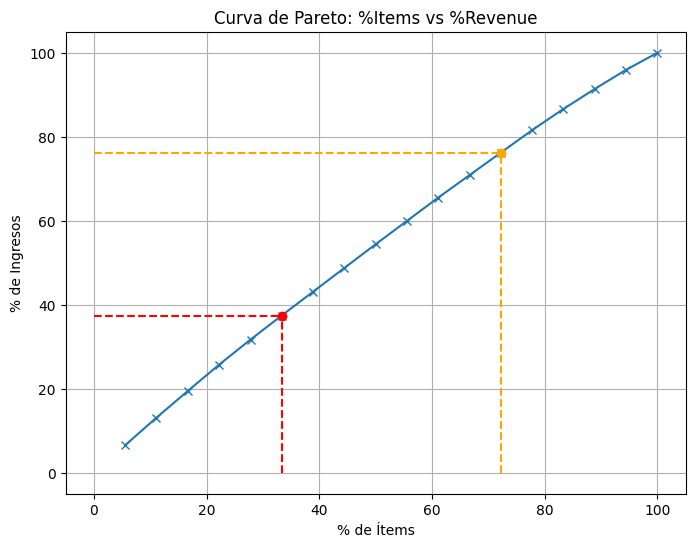

In [16]:
# Asegurarte de que %Item y %Revenue están como números (en caso de que los hayas formateado como string con %)
abcdf['%Item_num'] = abcdf['%Item'].str.replace('%', '').astype(float)
abcdf['%Revenue_num'] = abcdf['%Revenue'].str.replace('%', '').astype(float)

# Obtener el último valor de A y de B
ultimo_A = abcdf[abcdf['ABC'] == 'A'].iloc[-1]
ultimo_B = abcdf[abcdf['ABC'] == 'B'].iloc[-1]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(abcdf['%Item_num'], abcdf['%Revenue_num'], marker='x')

# Marcar y dibujar "L" para el último A
plt.plot([ultimo_A['%Item_num'], ultimo_A['%Item_num']], [0, ultimo_A['%Revenue_num']], color='red', linestyle='--')
plt.plot([0, ultimo_A['%Item_num']], [ultimo_A['%Revenue_num'], ultimo_A['%Revenue_num']], color='red', linestyle='--')
plt.scatter(ultimo_A['%Item_num'], ultimo_A['%Revenue_num'], color='red', zorder=5, label="Último A")

# Marcar y dibujar "L" para el último B
plt.plot([ultimo_B['%Item_num'], ultimo_B['%Item_num']], [0, ultimo_B['%Revenue_num']], color='orange', linestyle='--')
plt.plot([0, ultimo_B['%Item_num']], [ultimo_B['%Revenue_num'], ultimo_B['%Revenue_num']], color='orange', linestyle='--')
plt.scatter(ultimo_B['%Item_num'], ultimo_B['%Revenue_num'], color='orange', zorder=5, label="Último B")


# Etiquetas y título
plt.xlabel('% de Ítems')
plt.ylabel('% de Ingresos')
plt.title('Curva de Pareto: %Items vs %Revenue')
plt.grid(True)

plt.show()